In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

### Dataset Description
**ID:** ID of the customer.

**Age:** Age of the customer in years.

**Experience:** Amount of work experience in years.

**Income:** Amount of annual income (in thousands).

**Zipcode:** Postal code of the city in which the client lives.

**Family:** Number of family members.

**CCAvg:** Average monthly spending with the credit card (in thousands).

**Education:** Education level

- 1 : Bachelor's degree
- 2 : Master's degree
- 3 : Advanced/Professional degree.

**Mortgage:** Value of home mortgage, if any (in thousands).

**Securities Account:** Does the customer have a securities account with the bank?

**CD Account:** Does the customer have a certificate of deposit account (CD) with the bank?

**Online:** Does the customer use the internet banking facilities?

**CreditCard:** Does the customer use a credit card issued by the bank?

**Personal Loan:** Did this customer accept the personal loan offered in the last campaign?

## 1. Data Exploration

In [2]:
df = pd.read_csv('data/bankloan.csv')
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Rename some columns to remove periods and clearly mark our target variable.

In [4]:
df.rename(columns={"ZIP.Code":"Zip", "Personal.Loan":"Loan_decision", "Securities.Account":"Securities_account", "CD.Account":"CD_account"}, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   Zip                 5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Loan_decision       5000 non-null   int64  
 10  Securities_account  5000 non-null   int64  
 11  CD_account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Count of 5000 values in all features, meaning no missing values.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
Zip,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Loan_decision,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
df.corr().T

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan_decision,Securities_account,CD_account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Zip,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Loan_decision,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


Text(0.5, 1.0, 'Correlation heatmap')

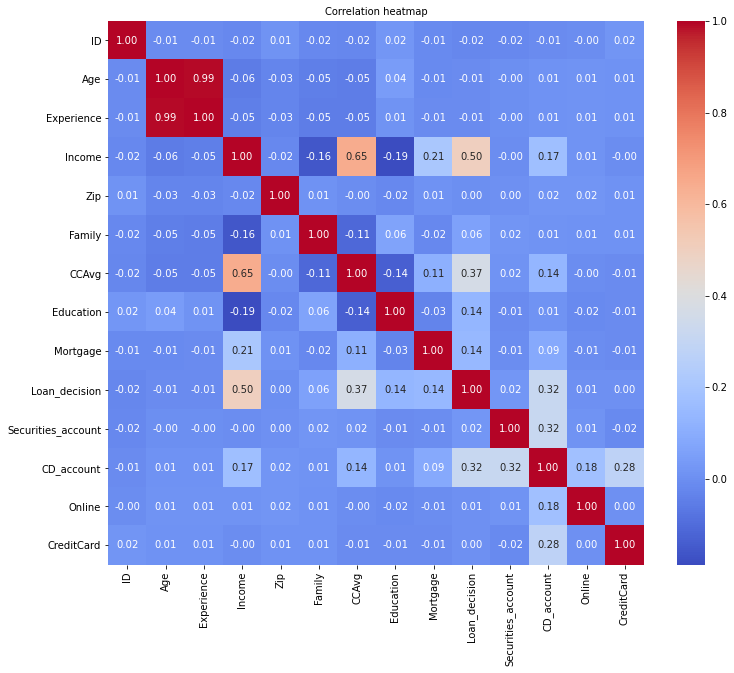

In [8]:
fig, ax = plt.subplots(figsize=(12,10))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
heatmap.set_title('Correlation heatmap' , fontdict={'fontsize':10})

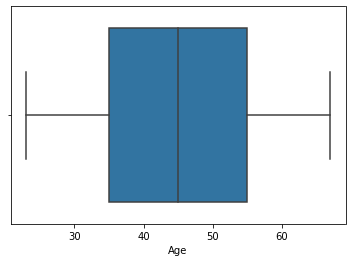

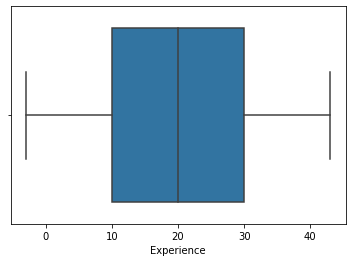

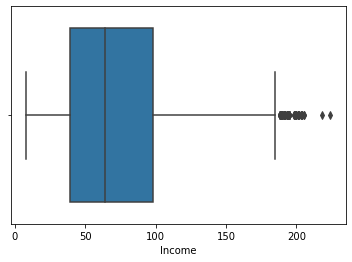

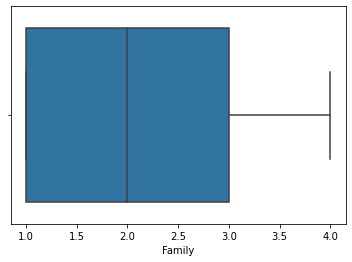

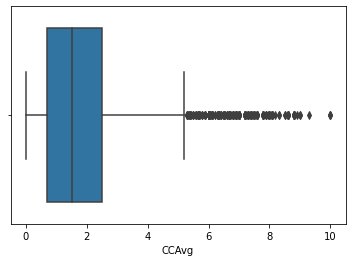

In [9]:
col_numeric = df[['Age', 'Experience', 'Income', 'Family', 'CCAvg']] 

for col in col_numeric.columns:
    if df[col].dtype!= "object":
        sns.boxplot(x=df[col])
        plt.show()

<AxesSubplot:xlabel='Income', ylabel='Loan_decision'>

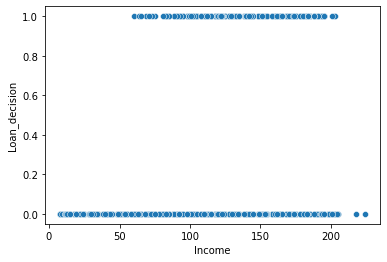

In [10]:
sns.scatterplot(data=df, x='Income', y='Loan_decision')

<AxesSubplot:xlabel='CCAvg', ylabel='Loan_decision'>

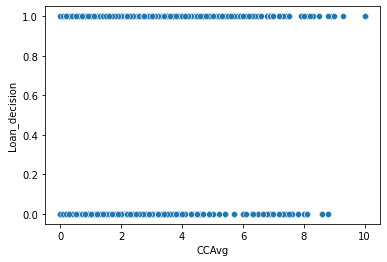

In [11]:
sns.scatterplot(data=df, x='CCAvg', y='Loan_decision')

In [12]:
df['Income'].describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [13]:
df['Income'].median()

64.0

In [14]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
IQR = q3 - q1
outliers =  df['Income'][((df['Income']<(q1-1.5*IQR)) | (df['Income']>(q3+1.5*IQR)))]
print("number of outliers in Income: " + str(len(outliers)))

number of outliers in Income: 96


In [15]:
df['CCAvg'].describe()

count    5000.000000
mean        1.937938
std         1.747659
min         0.000000
25%         0.700000
50%         1.500000
75%         2.500000
max        10.000000
Name: CCAvg, dtype: float64

In [16]:
df['CCAvg'].median()

1.5

In [17]:
q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
IQR = q3 - q1
outliers =  df['CCAvg'][((df['CCAvg']<(q1-1.5*IQR)) | (df['CCAvg']>(q3+1.5*IQR)))]
len(outliers)
print("number of outliers in CCAvg: " + str(len(outliers)))

number of outliers in CCAvg: 324


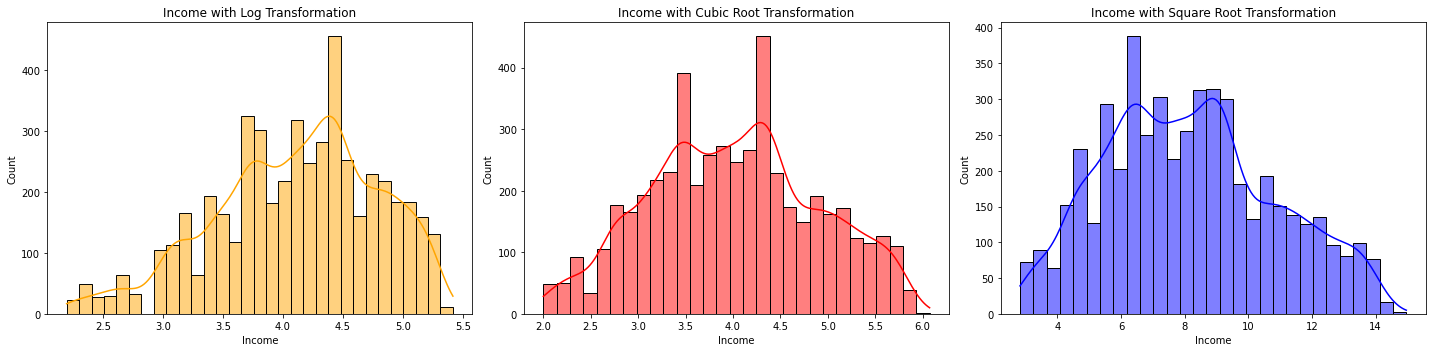

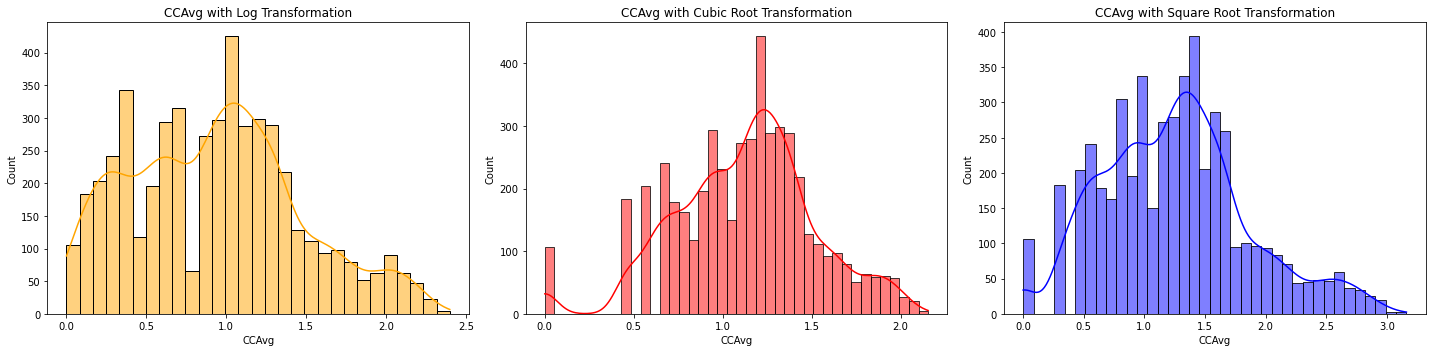

In [18]:
skewed_columns =['Income','CCAvg']

for col in skewed_columns:
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))  # Create a 1x4 grid of subplots

    # Log Transformation
    sns.histplot(np.log(df[col] + 1), color='orange', ax=axes[0],kde=True)
    axes[0].set_title(f'{col} with Log Transformation')

    # Cubic Root Transformation
    sns.histplot(np.cbrt(df[col]), color='red', ax=axes[1],kde=True)
    axes[1].set_title(f'{col} with Cubic Root Transformation')

    # Square Root Transformation
    sns.histplot(np.sqrt(df[col]), color='blue', ax=axes[2],kde=True)
    axes[2].set_title(f'{col} with Square Root Transformation')

    plt.tight_layout()
    plt.show()
    print("\n")

Cubic transformation for the Income feature is the best transformation. Either cubic or square root transformation would be the best for the CCAvg feature. 

In [19]:
df['Income'] = np.cbrt(df['Income'])
df['CCAvg'] = np.cbrt(df['CCAvg'])

In [20]:
df.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan_decision,Securities_account,CD_account,Online,CreditCard
0,1,25,1,3.659306,91107,4,1.169607,1,0,0,1,0,0,0
1,2,45,19,3.239612,90089,3,1.144714,1,0,0,1,0,0,0
2,3,39,15,2.223980,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,4.641589,94112,1,1.392477,2,0,0,0,0,0,0
4,5,35,8,3.556893,91330,4,1.000000,2,0,0,0,0,0,1


In [21]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
IQR = q3 - q1
outliers =  df['Income'][((df['Income']<(q1-1.5*IQR)) | (df['Income']>(q3+1.5*IQR)))]
print("number of outliers in Income: " + str(len(outliers)))

number of outliers in Income: 0


In [22]:
q1 = df['CCAvg'].quantile(0.25)
q3 = df['CCAvg'].quantile(0.75)
IQR = q3 - q1
outliers =  df['CCAvg'][((df['CCAvg']<(q1-1.5*IQR)) | (df['CCAvg']>(q3+1.5*IQR)))]
len(outliers)
print("number of outliers in CCAvg: " + str(len(outliers)))

number of outliers in CCAvg: 122


In [23]:
df['CCAvg'].value_counts()

0.669433    241
1.000000    231
0.584804    204
1.259921    188
0.928318    187
           ... 
1.401020      1
1.542489      1
1.481248      1
1.671497      1
1.493303      1
Name: CCAvg, Length: 108, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for col in columns:
    df_scaled[col] = scaler.fit_transform(np.array(df_scaled[col]).reshape(-1,1))

In [25]:
df_scaled.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Loan_decision,Securities_account,CD_account,Online,CreditCard
0,1,-1.774417,-1.666078,-0.390648,91107,1.397414,0.109343,-1.049078,-0.555524,0,1,0,0,0
1,2,-0.029524,-0.096330,-0.863640,90089,0.525991,0.045904,-1.049078,-0.555524,0,1,0,0,0
2,3,-0.552992,-0.445163,-2.008249,94720,-1.216855,-0.322893,-1.049078,-0.555524,0,0,0,0,0
3,4,-0.901970,-0.968413,0.716378,94112,-1.216855,0.677315,0.141703,-0.555524,0,0,0,0,0
4,5,-0.901970,-1.055621,-0.506066,91330,1.397414,-0.322893,0.141703,-0.555524,0,0,0,0,1


In [26]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop(['Loan_decision'], axis=1)
Y = df_scaled['Loan_decision']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
X_train.head()

,ID,Age,Experience,Income,Zip,Family,CCAvg,Education,Mortgage,Securities_account,CD_account,Online,CreditCard
4227,4228,-1.163704,-1.142829,0.901550,90277,-1.216855,1.105491,-1.049078,-0.555524,1,0,0,0
4676,4677,-0.552992,-0.619580,0.085337,91950,0.525991,0.392150,-1.049078,-0.555524,1,0,1,0
800,801,-1.250949,-1.142829,1.765006,91040,-1.216855,1.759500,-1.049078,-0.555524,0,0,1,0
3671,3672,0.406700,0.426919,-1.561102,93106,-1.216855,-0.993630,1.332484,-0.555524,0,0,1,0
4193,4194,1.453636,1.473418,-0.974345,95008,0.525991,-1.381002,-1.049078,-0.555524,0,0,1,0


In [28]:
from sklearn.linear_model import LogisticRegression


In [29]:
model=LogisticRegression(penalty='l2', C=1.0,solver='liblinear', max_iter=400, random_state=42)

In [30]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=400, random_state=42, solver='liblinear')

In [31]:
y_pred_test=model.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
accuracy=accuracy_score(y_test,y_pred_test)
accuracy

0.895

In [34]:
conf_matrix=confusion_matrix(y_test,y_pred_test)
conf_matrix

array([[895,   0],
       [105,   0]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

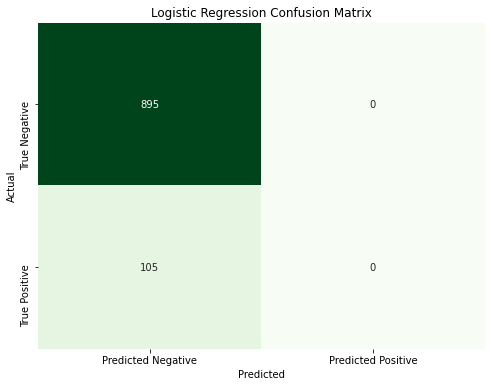

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

In [36]:
report=classification_report(y_test,y_pred_test)

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
print(report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.00      0.00      0.00       105

    accuracy                           0.90      1000
   macro avg       0.45      0.50      0.47      1000
weighted avg       0.80      0.90      0.85      1000



In [38]:
from sklearn.model_selection import GridSearchCV,KFold

In [39]:
num_folds=5
kf=KFold(n_splits=num_folds,shuffle=True,random_state=42)

In [40]:
params={
    'penalty': ['l1','l2'],
    'C': [0.0001,0.001,0.01,0.1,1,10,100],
    'solver': ['liblinear','lbfgs','sag','newton-cg'],
    'max_iter': [100,200,300,400]
    
}

grid_search=GridSearchCV(model,param_grid=params,cv=kf,scoring='accuracy')

In [41]:
grid_search.fit(X_train,y_train)

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warn

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearc

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAM

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Use

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Use

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "
C:\Users\ZAMRU

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Use

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Use

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnin

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearc

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  warnin

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\lear

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearc

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Use

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:477: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ZAMRUTIYA\AppDa

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=400, random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']},
             scoring='accuracy')

In [42]:
best_params=grid_search.best_params_
best_params

{'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [43]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(C=1, penalty='l1', random_state=42, solver='liblinear')

In [44]:
y_pred_test_grid=best_model.predict(X_test)


In [45]:
accuracy=accuracy_score(y_test,y_pred_test_grid)
accuracy

0.959

In [46]:
conf_matrix=confusion_matrix(y_test,y_pred_test_grid)
conf_matrix

array([[884,  11],
       [ 30,  75]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression with GridSearchCV Confusion Matrix')

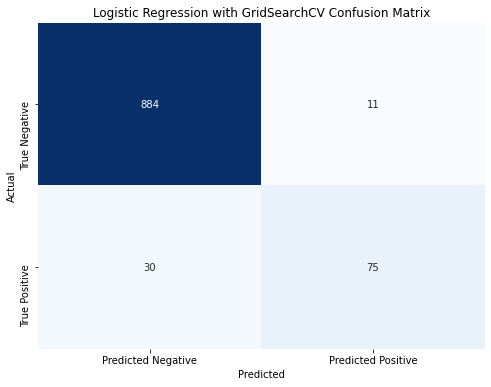

In [47]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with GridSearchCV Confusion Matrix')

In [48]:
report=classification_report(y_test,y_pred_test_grid)

In [49]:
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       895
           1       0.87      0.71      0.79       105

    accuracy                           0.96      1000
   macro avg       0.92      0.85      0.88      1000
weighted avg       0.96      0.96      0.96      1000



In [50]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_upsampled, y_train_upsampled = smote.fit_resample(X_train, y_train)

In [51]:
print(sum(y_train==0))
print(sum(y_train==1))

3625
375


In [52]:
print(sum(y_train_upsampled==0))
print(sum(y_train_upsampled==1))

3625
3625


In [53]:
model=LogisticRegression(penalty='l2', C=1.0,solver='liblinear', max_iter=400, random_state=42)
model.fit(X_train_upsampled,y_train_upsampled)
y_pred_test=model.predict(X_test)


In [54]:
conf_matrix=confusion_matrix(y_test,y_pred_test)
conf_matrix

array([[799,  96],
       [ 12,  93]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression with Resampled Data Confusion Matrix')

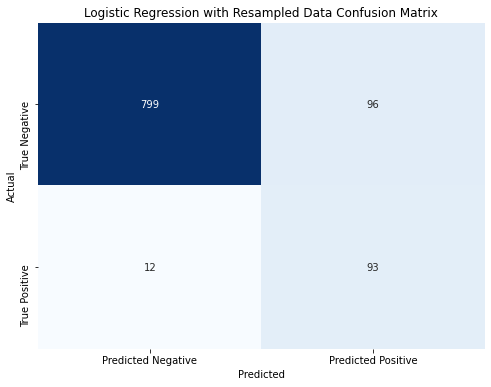

In [55]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with Resampled Data Confusion Matrix')

In [56]:
report=classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.49      0.89      0.63       105

    accuracy                           0.89      1000
   macro avg       0.74      0.89      0.78      1000
weighted avg       0.93      0.89      0.90      1000



In [57]:
model_upsampled = LogisticRegression(random_state=42)

In [58]:
params={
    'penalty': ['l1','l2'],
    'C': [0.0001,0.001,0.01,0.1,1,10,100],
    'solver': ['liblinear','lbfgs','sag','newton-cg'],
    'max_iter': [100,200,300,400,500,600,700,800]
}

grid_search=GridSearchCV(estimator=model_upsampled,param_grid=params,cv=kf,scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train_upsampled,y_train_upsampled)

C:\Users\ZAMRUTIYA\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg']},
             scoring='f1_macro')

In [59]:
best_params=grid_search.best_params_
best_params

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [60]:
best_model=grid_search.best_estimator_
best_model

LogisticRegression(C=10, penalty='l1', random_state=42, solver='liblinear')

In [61]:
y_test_upsampled_gridsearch = best_model.predict(X_test)

In [62]:
conf_matrix=confusion_matrix(y_test,y_test_upsampled_gridsearch)
conf_matrix

array([[799,  96],
       [ 12,  93]], dtype=int64)

Text(0.5, 1.0, 'Logistic Regression with GridSearchCV and Resampled Data Confusion Matrix')

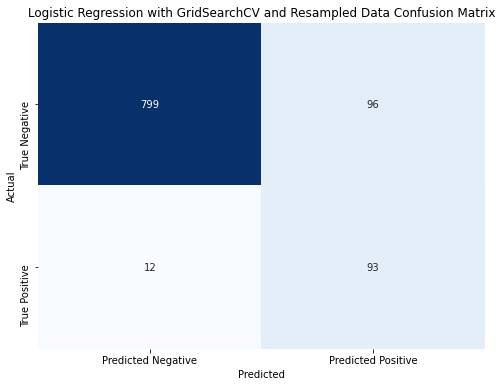

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression with GridSearchCV and Resampled Data Confusion Matrix')

In [64]:
report = classification_report(y_test,y_test_upsampled_gridsearch)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       895
           1       0.49      0.89      0.63       105

    accuracy                           0.89      1000
   macro avg       0.74      0.89      0.78      1000
weighted avg       0.93      0.89      0.90      1000



In [65]:
from sklearn.tree import DecisionTreeClassifier


In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto',n_jobs=-1,random_state=42)
X_train_upsampled_DT, y_train_upsampled_DT = smote.fit_resample(X_train, y_train)

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_train_upsampled_DT,y_train_upsampled_DT,test_size=0.2,random_state=42)

In [68]:
X_train_upsampled_DT.shape

(7250, 13)

In [69]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',random_state=42,class_weight='balanced')

In [70]:
model.fit(X_train,y_train)
y_pred_test_DT=model.predict(X_test)

In [71]:
conf_matrix=confusion_matrix(y_test,y_pred_test_DT)
conf_matrix

array([[659, 102],
       [ 43, 646]], dtype=int64)

Text(0.5, 1.0, 'Decision Tree Confusion Matrix')

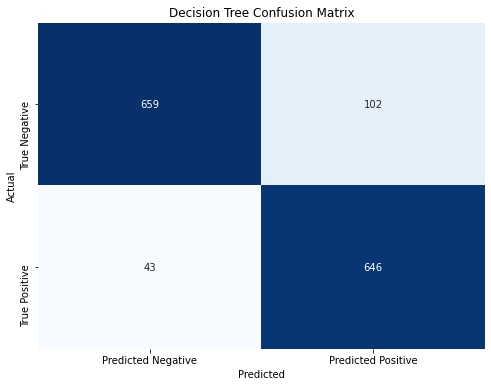

In [72]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')

In [73]:
report=classification_report(y_test,y_pred_test_DT)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       761
           1       0.86      0.94      0.90       689

    accuracy                           0.90      1450
   macro avg       0.90      0.90      0.90      1450
weighted avg       0.90      0.90      0.90      1450



In [74]:
param_grid={
    'max_depth': [3,5,7,9,10,None],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf': [1,2,4,5],
    'max_features': ['sqrt','log2',None],
    'criterion': ['gini','entropy'],
    'class_weight': [None, 'balanced']
    
}

clf_param_grid=DecisionTreeClassifier(random_state=42)
grid_search_DT=GridSearchCV(estimator=clf_param_grid,param_grid=param_grid,cv=kf,scoring='accuracy',n_jobs=-1)


In [75]:
grid_search_DT.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10]},
             scoring='accuracy')

In [76]:
best_params=grid_search_DT.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [77]:
best_score=grid_search_DT.best_score_
best_score

0.9817241379310344

In [78]:
best_model=grid_search_DT.best_estimator_
best_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [79]:
y_pred_grid_DT=best_model.predict(X_test)

In [80]:
acc=accuracy_score(y_test,y_pred_grid_DT)
acc

0.9875862068965517

In [81]:
conf_mat=confusion_matrix(y_test,y_pred_grid_DT)
conf_mat

array([[750,  11],
       [  7, 682]], dtype=int64)

Text(0.5, 1.0, 'Decision Tree with GridSearchCV Confusion Matrix')

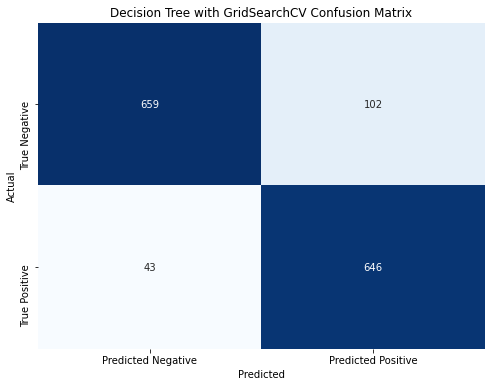

In [82]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree with GridSearchCV Confusion Matrix')

In [83]:
class_report=classification_report(y_test,y_pred_grid_DT)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       0.98      0.99      0.99       689

    accuracy                           0.99      1450
   macro avg       0.99      0.99      0.99      1450
weighted avg       0.99      0.99      0.99      1450



In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
param_grid={
    'n_estimators': [50,100,150,200,300],
    'max_depth': [3,5,7,9,10,None],
    'min_samples_split': [2,5,7,10],
    'min_samples_leaf': [1,2,4,5],
    'max_features': ['sqrt','log2'],
    'class_weight': [None, 'balanced'],
    'criterion': ['gini','entropy']
    
}
clf_param_grid=RandomForestClassifier(random_state=42)
grid_search_RF=GridSearchCV(estimator=clf_param_grid,param_grid=param_grid,cv=kf,scoring='accuracy',n_jobs=-1)


In [86]:
grid_search_RF.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 10, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 150, 200, 300]},
             scoring='accuracy')

In [87]:
best_params=grid_search_RF.best_params_
best_params

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

In [88]:
best_score=grid_search_RF.best_score_
best_score

0.9901724137931035

In [89]:
best_model=grid_search_RF.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=150, random_state=42)

In [90]:
y_pred_grid_RF=best_model.predict(X_test)

In [91]:
acc=accuracy_score(y_test,y_pred_grid_RF)
acc

0.9924137931034482

In [92]:
conf_mat=confusion_matrix(y_test,y_pred_grid_RF)
conf_mat

array([[757,   4],
       [  7, 682]], dtype=int64)

Text(0.5, 1.0, 'Random Forest with GridSearchCV Confusion Matrix')

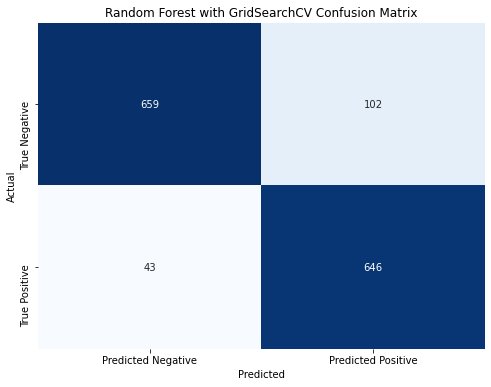

In [93]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest with GridSearchCV Confusion Matrix')

In [94]:
class_report=classification_report(y_test,y_pred_grid_RF)
print(class_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       761
           1       0.99      0.99      0.99       689

    accuracy                           0.99      1450
   macro avg       0.99      0.99      0.99      1450
weighted avg       0.99      0.99      0.99      1450

